In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# import plotly_express as px 
# import plotly.graph_objs as go
# import plotly.offline as py 
# from plotly.offline import plot, iplot, init_notebook_mode 
# from plotly.subplots import make_subplots 
# import plotly.subplots as sp 
from scipy import stats 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 

In [2]:
upset_count = pd.read_csv("mm_data/Upset Count.csv")

In [3]:
print(upset_count.head())
print(upset_count.shape)

   YEAR  FIRST ROUND  SECOND ROUND  SWEET 16  ELITE 8  FINAL 4  TOTAL
0  2023            5             4         3        2        0     14
1  2022            7             5         4        0        1     17
2  2021            9             6         2        1        0     18
3  2019            8             0         1        2        0     11
4  2018            6             5         3        1        0     15
(15, 7)


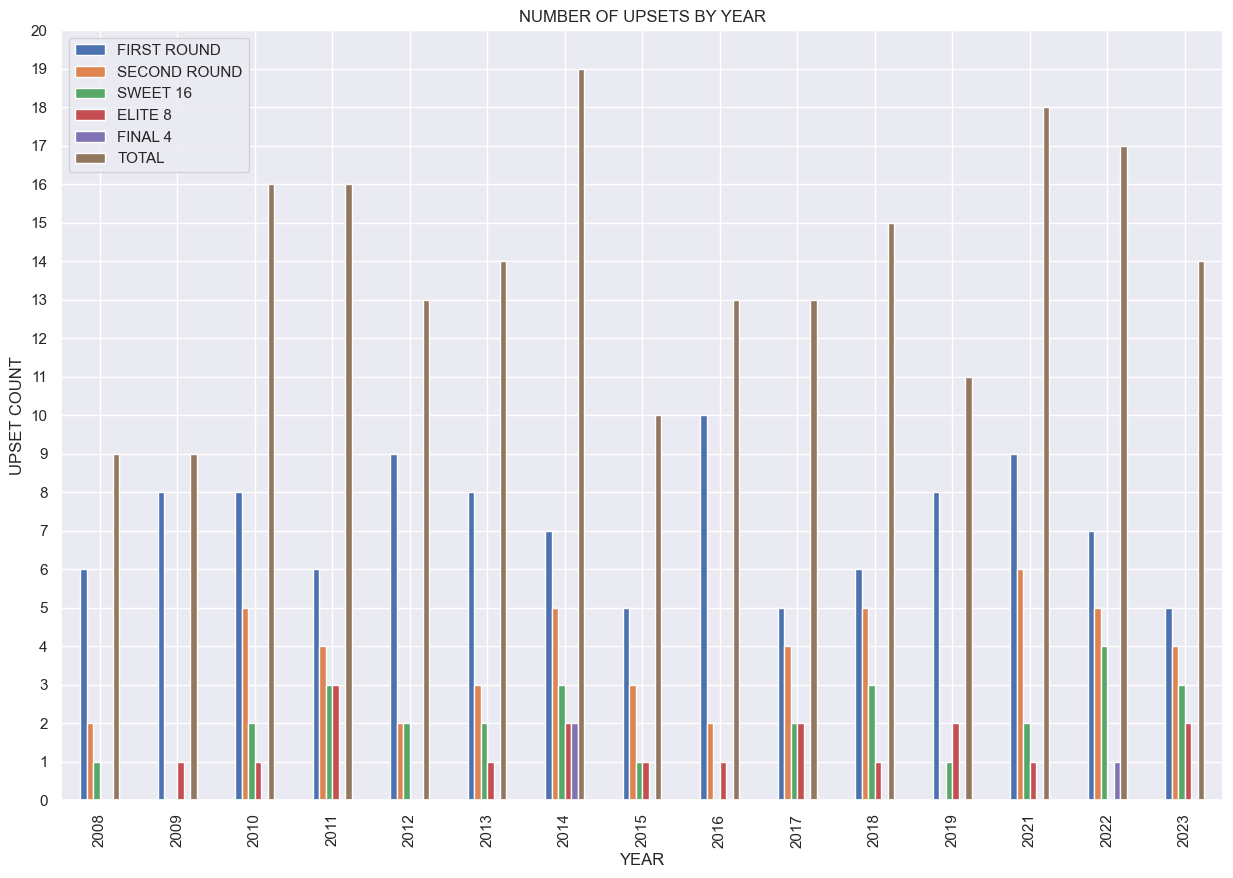

In [4]:
sns.set_theme(rc = {'figure.figsize' : (15, 10)})
upsets_count = upset_count.iloc[:: - 1]
selected_columns = upsets_count.columns
upsets_count[selected_columns].plot(x = 'YEAR', kind = 'bar', stacked = False, title = 'NUMBER OF UPSETS BY YEAR') 
plt.yticks(np.arange(21))
plt.ylabel('UPSET COUNT'); 

In [5]:
upset_seeds = pd.read_csv("mm_data/Upset Seed Info.csv")

In [6]:
upset_seeds.head()

,YEAR,CURRENT ROUND,SEED WON,SEED LOST,SEED DIFF
0,2023,64,13,4,9
1,2023,64,15,2,13
2,2023,64,16,1,15
3,2023,64,11,6,5
4,2023,64,10,7,3


In [7]:
matchups = pd.read_csv("mm_data/Tournament Matchups.csv")

In [8]:
matchups.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE
0,2024,2034,NaN,1033,Purdue,1,1,64,NaN
1,2024,2033,NaN,1032,Quinnipiac,16,64,64,NaN
2,2024,2032,NaN,1065,Connecticut,1,1,64,NaN
3,2024,2031,NaN,1026,South Dakota St.,16,64,64,NaN
4,2024,2030,NaN,1053,Houston,1,1,64,NaN


In [9]:
matchups = matchups[matchups['YEAR'] != 2024]
matchups.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE
146,2023,1888,1888.0,1011,Alabama,1,16,64,96.0
147,2023,1887,1887.0,955,Texas A&M Corpus Chris,16,64,64,75.0
148,2023,1886,1886.0,979,Maryland,8,32,64,67.0
149,2023,1885,1885.0,945,West Virginia,9,64,64,65.0
150,2023,1884,1884.0,961,San Diego St.,5,2,64,63.0


In [10]:
matchups['OUTCOME'] = ''

round_64 = matchups.loc[matchups['CURRENT ROUND'] == 64] 
round_32 = matchups.loc[matchups['CURRENT ROUND'] == 32] 
sweet_16 = matchups.loc[matchups['CURRENT ROUND'] == 16] 
elite_8 = matchups.loc[matchups['CURRENT ROUND'] == 8] 
final_4 = matchups.loc[matchups['CURRENT ROUND'] == 4] 
finals = matchups.loc[matchups['CURRENT ROUND'] == 2] 
nothing = matchups.loc[matchups['CURRENT ROUND'] == 0] 

In [11]:
round_64.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,OUTCOME
146,2023,1888,1888.0,1011,Alabama,1,16,64,96.0,
147,2023,1887,1887.0,955,Texas A&M Corpus Chris,16,64,64,75.0,
148,2023,1886,1886.0,979,Maryland,8,32,64,67.0,
149,2023,1885,1885.0,945,West Virginia,9,64,64,65.0,
150,2023,1884,1884.0,961,San Diego St.,5,2,64,63.0,


In [12]:
round_64 = round_64.reset_index(drop = True) 
round_32 = round_32.reset_index(drop = True) 
sweet_16 = sweet_16.reset_index(drop = True) 
elite_8 = elite_8.reset_index(drop = True) 
final_4 = final_4.reset_index(drop = True) 
finals = finals.reset_index(drop = True) 
nothing = nothing.reset_index(drop = True) 

In [13]:
round_64.loc[round_64['ROUND'] != 64, 'OUTCOME'] = 'W' 
round_64.loc[round_64['ROUND'] == 64, 'OUTCOME'] = 'L'
round_32.loc[round_32['ROUND'] != 32, 'OUTCOME'] = 'W'
round_32.loc[round_32['ROUND'] == 32, 'OUTCOME'] = 'L'
sweet_16.loc[sweet_16['ROUND'] != 16, 'OUTCOME'] = 'W'
sweet_16.loc[sweet_16['ROUND'] == 16, 'OUTCOME'] = 'L'
elite_8.loc[elite_8['ROUND'] != 8, 'OUTCOME'] = 'W'
elite_8.loc[elite_8['ROUND'] == 8, 'OUTCOME'] = 'L'
final_4.loc[final_4['ROUND'] != 4, 'OUTCOME'] = 'W'
final_4.loc[final_4['ROUND'] == 4, 'OUTCOME'] = 'L'
finals.loc[finals['ROUND'] != 2, 'OUTCOME'] = 'W'
finals.loc[finals['ROUND'] == 2, 'OUTCOME'] = 'L'
nothing.loc[nothing['ROUND'] == 0, 'OUTCOME'] = 'N / A'

In [14]:
round_64.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,OUTCOME
0,2023,1888,1888.0,1011,Alabama,1,16,64,96.0,W
1,2023,1887,1887.0,955,Texas A&M Corpus Chris,16,64,64,75.0,L
2,2023,1886,1886.0,979,Maryland,8,32,64,67.0,W
3,2023,1885,1885.0,945,West Virginia,9,64,64,65.0,L
4,2023,1884,1884.0,961,San Diego St.,5,2,64,63.0,W


In [15]:
team_id = pd.DataFrame(columns = ["ID", "TEAM"])

In [16]:
team_id.head()

,ID,TEAM


In [17]:
new_rows = []

for index, row in matchups.iterrows():
    new_row = {"ID": row["TEAM NO"], "TEAM": row["TEAM"]}
    new_rows.append(new_row)

new_rows_df = pd.DataFrame(new_rows)

In [18]:
team_id = pd.concat([team_id, new_rows_df])

In [19]:
team_id.head()

,ID,TEAM
0,1011,Alabama
1,955,Texas A&M Corpus Chris
2,979,Maryland
3,945,West Virginia
4,961,San Diego St.


In [20]:
matchups = pd.concat([round_64, round_32], ignore_index = True, sort = False)
matchups = pd.concat([matchups, sweet_16], ignore_index = True, sort = False)
matchups = pd.concat([matchups, elite_8], ignore_index = True, sort = False)
matchups = pd.concat([matchups, final_4], ignore_index = True, sort = False)
matchups = pd.concat([matchups, finals], ignore_index = True, sort = False)
matchups = pd.concat([matchups, nothing], ignore_index = True, sort = False)

In [21]:
matchups.head()

,YEAR,BY YEAR NO,BY ROUND NO,TEAM NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,OUTCOME
0,2023,1888,1888.0,1011,Alabama,1,16,64,96.0,W
1,2023,1887,1887.0,955,Texas A&M Corpus Chris,16,64,64,75.0,L
2,2023,1886,1886.0,979,Maryland,8,32,64,67.0,W
3,2023,1885,1885.0,945,West Virginia,9,64,64,65.0,L
4,2023,1884,1884.0,961,San Diego St.,5,2,64,63.0,W


In [22]:
# 538 ratings: did not include because they are going out of date as of 2023 (no 2024+ data)

In [23]:
matchups.shape

(1888, 10)

In [24]:
# Statistics for every tournament team's away and neutral games combined since 2008 from https://www.barttorvik.com/#. The ranks of every statistic are ranked out of all Division I College Basketball Teams.
bart_an = pd.read_csv("mm_data\Barttorvik Away-Neutral.csv")

In [25]:
bart_an_subset = bart_an[["TEAM NO", "BADJ EM", "BADJ O", "BADJ D", "BARTHAG"]]
matchups = pd.merge(bart_an_subset, matchups, on="TEAM NO", how='right')

In [26]:
# matchups.drop(columns=["BADJ EM_x",	"BADJ O_x",	"BADJ D_x",	"BARTHAG_x",	"BADJ EM_y",	"BADJ O_y",	"BADJ D_y"], inplace=True)

In [27]:
# matchups.drop(columns=["BARTHAG_y"], inplace=True)

In [28]:
display(matchups)

,TEAM NO,BADJ EM,BADJ O,BADJ D,BARTHAG,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,OUTCOME
0,1011,22.6,110.8,88.2,0.932,2023,1888,1888.0,Alabama,1,16,64,96.0,W
1,955,-2.0,102.4,104.4,0.445,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,L
2,979,12.5,105.3,92.8,0.811,2023,1886,1886.0,Maryland,8,32,64,67.0,W
3,945,17.6,114.8,97.2,0.871,2023,1885,1885.0,West Virginia,9,64,64,65.0,L
4,961,17.2,109.1,91.9,0.878,2023,1884,1884.0,San Diego St.,5,2,64,63.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,188,25.1,114.7,89.6,0.945,2010,253,5.0,Duke,1,1,2,61.0,W
1884,101,19.9,112.6,92.7,0.904,2009,128,4.0,Michigan St.,2,2,2,72.0,L
1885,95,29.3,122.3,93.0,0.959,2009,127,3.0,North Carolina,1,1,2,89.0,W
1886,43,30.2,119.2,89.0,0.966,2008,2,2.0,Kansas,1,1,2,68.0,W


In [29]:
matchups = matchups.dropna(subset=['YEAR'])

In [30]:
matchups.head()

,TEAM NO,BADJ EM,BADJ O,BADJ D,BARTHAG,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,OUTCOME
0,1011,22.6,110.8,88.2,0.932,2023,1888,1888.0,Alabama,1,16,64,96.0,W
1,955,-2.0,102.4,104.4,0.445,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,L
2,979,12.5,105.3,92.8,0.811,2023,1886,1886.0,Maryland,8,32,64,67.0,W
3,945,17.6,114.8,97.2,0.871,2023,1885,1885.0,West Virginia,9,64,64,65.0,L
4,961,17.2,109.1,91.9,0.878,2023,1884,1884.0,San Diego St.,5,2,64,63.0,W


In [31]:
bart_h = pd.read_csv("mm_data\Barttorvik Home.csv")

bart_h_subset = bart_h[["TEAM NO", "BADJ EM", "BADJ O", "BADJ D", "BARTHAG"]]
matchups = pd.merge(bart_h_subset, matchups, on="TEAM NO", how='right')

matchups = matchups.dropna(subset=['YEAR'])
display(matchups)

,TEAM NO,BADJ EM_x,BADJ O_x,BADJ D_x,BARTHAG_x,BADJ EM_y,BADJ O_y,BADJ D_y,BARTHAG_y,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,OUTCOME
0,1011,33.0,121.6,88.6,0.974,22.6,110.8,88.2,0.932,2023,1888,1888.0,Alabama,1,16,64,96.0,W
1,955,-1.2,107.8,109.0,0.468,-2.0,102.4,104.4,0.445,2023,1887,1887.0,Texas A&M Corpus Chris,16,64,64,75.0,L
2,979,20.8,118.1,97.3,0.903,12.5,105.3,92.8,0.811,2023,1886,1886.0,Maryland,8,32,64,67.0,W
3,945,21.8,117.4,95.6,0.914,17.6,114.8,97.2,0.871,2023,1885,1885.0,West Virginia,9,64,64,65.0,L
4,961,25.7,113.8,88.1,0.950,17.2,109.1,91.9,0.878,2023,1884,1884.0,San Diego St.,5,2,64,63.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,188,37.2,123.6,86.4,0.984,25.1,114.7,89.6,0.945,2010,253,5.0,Duke,1,1,2,61.0,W
1884,101,25.5,111.3,85.8,0.952,19.9,112.6,92.7,0.904,2009,128,4.0,Michigan St.,2,2,2,72.0,L
1885,95,28.0,121.3,93.3,0.953,29.3,122.3,93.0,0.959,2009,127,3.0,North Carolina,1,1,2,89.0,W
1886,43,39.8,122.5,82.7,0.989,30.2,119.2,89.0,0.966,2008,2,2.0,Kansas,1,1,2,68.0,W


In [32]:
# is for away and neutral games and y is for home games in the barttorvik scores

In [33]:
heat_check = pd.read_csv("mm_data\Heat Check Tournament Index.csv")

heat_check_subset = heat_check[["TEAM NO", "POWER", "PATH", "POOL VALUE"]]
matchups = pd.merge(heat_check_subset, matchups, on="TEAM NO", how='right')

matchups = matchups.dropna(subset=['YEAR'])

In [34]:
matchups.sample(5)

,TEAM NO,POWER,PATH,POOL VALUE,BADJ EM_x,BADJ O_x,BADJ D_x,BARTHAG_x,BADJ EM_y,BADJ O_y,...,BARTHAG_y,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,OUTCOME
848,122,NaN,NaN,NaN,20.1,110.0,89.9,0.911,22.4,117.2,...,0.920,2009,234,1040.0,BYU,8,64,64,66.0,L
31,947,NaN,NaN,NaN,12.4,112.2,99.8,0.794,3.2,105.3,...,0.588,2023,1857,1857.0,Vermont,15,64,64,61.0,L
127,919,53.1,81.1,1.8,-2.3,101.7,104.0,0.436,6.1,105.9,...,0.664,2022,1699,1761.0,Jacksonville St.,15,64,64,61.0,L
605,378,56.0,81.9,2.1,11.7,119.6,107.9,0.766,7.1,110.5,...,0.682,2013,725,1283.0,Iona,15,64,64,70.0,L
440,546,76.3,69.1,15.6,21.4,116.6,95.2,0.912,15.0,114.1,...,0.835,2016,1076,1448.0,Utah,3,32,64,80.0,W


In [35]:
# public_picks = pd.read_csv("mm_data\Public Picks.csv")

# public_picks_subset = public_picks[["TEAM NO", "R64", "R32", "S16", "E8", "F4", "FINALS"]]
# matchups = pd.merge(public_picks_subset, matchups, on="TEAM NO", how='right')

# matchups = matchups.dropna(subset=['YEAR'])

In [36]:
# public_picks.head()

In [37]:
shooting_splits = pd.read_csv("mm_data\Shooting Splits.csv")

shooting_splits_subset = shooting_splits[["TEAM NO", "DUNKS FG%", "DUNKS SHARE", "DUNKS FG%D", "DUNKS D SHARE", "CLOSE TWOS FG%"]]
matchups = pd.merge(shooting_splits_subset, matchups, on="TEAM NO", how='right')

matchups = matchups.dropna(subset=['YEAR'])

In [38]:
matchups.sample(5)

,TEAM NO,DUNKS FG%,DUNKS SHARE,DUNKS FG%D,DUNKS D SHARE,CLOSE TWOS FG%,POWER,PATH,POOL VALUE,BADJ EM_x,...,BARTHAG_y,YEAR,BY YEAR NO,BY ROUND NO,TEAM,SEED,ROUND,CURRENT ROUND,SCORE,OUTCOME
1563,478,90.3,5.8,85.2,4.3,64.7,79.2,70.2,32.4,32.5,...,0.917,2015,899,325.0,Utah,5,16,16,57.0,L
160,838,91.3,7.8,89.9,8.3,59.5,74.4,78.9,11.3,17.0,...,0.857,2021,1604,1728.0,North Carolina,8,64,64,62.0,L
242,805,85.1,13.0,88.2,8.6,62.6,78.7,70.5,27.8,31.4,...,0.865,2019,1460,1646.0,Auburn,5,4,64,78.0,W
406,553,81.7,7.8,93.7,5.1,57.4,68.5,66.3,14.0,16.6,...,0.853,2016,1110,1482.0,Texas,6,64,64,72.0,L
884,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,...,0.948,2009,198,1004.0,Gonzaga,4,16,64,77.0,W


In [39]:
matchups.to_csv("matchups.csv")

In [45]:
nan_count = matchups.isna().sum()

In [42]:
matchups.shape

(1888, 26)

In [43]:
matchups = matchups.drop(columns=["POWER", "PATH", "POOL VALUE"])

In [44]:
matchups.dropna(subset=['DUNKS FG%'], inplace=True)

In [46]:
print(nan_count)

TEAM NO           0
DUNKS FG%         0
DUNKS SHARE       0
DUNKS FG%D        0
DUNKS D SHARE     0
CLOSE TWOS FG%    0
BADJ EM_x         0
BADJ O_x          0
BADJ D_x          0
BARTHAG_x         0
BADJ EM_y         0
BADJ O_y          0
BADJ D_y          0
BARTHAG_y         0
YEAR              0
BY YEAR NO        0
BY ROUND NO       0
TEAM              0
SEED              0
ROUND             0
CURRENT ROUND     0
SCORE             0
OUTCOME           0
dtype: int64


In [47]:
matchups.to_csv("matchups.csv")